# Gas

## Haser model

sbpy has the Haser model for gas comae, assuming a 1 dimensional outflow.  It is capabable of modeling parent and daughter species (e.g., up to 1 generation of fragmentation):

In [1]:
import astropy.units as u
from sbpy.activity.gas import Haser, photo_lengthscale
from sbpy import bib

bib.track()

Q = 1e28 / u.s
v = 800 * u.m / u.s
parent = photo_lengthscale('H2O')
coma = Haser(Q, v, parent)

# total number in 10,000 km radius aperture
rho = 1e4 * u.km
print(coma.total_number(rho))

bib.stop()
print("\nSources\n", bib.show())

1.3098195396338546e+32

Sources
 sbpy:
  software: sbpy:
    2019JOSS....4.1426M
sbpy.activity.gas.core.photo_lengthscale:
  H2O photodissociation lengthscale:
    1993Icar..105..235C
sbpy.activity.gas.core.Haser.__init__:
  model:
    1957BSRSL..43..740H
sbpy.activity.gas.core.GasComa.total_number:
  model:
    1978Icar...35..360N



Other aperture geometries are possible:

In [2]:
from sbpy.activity import RectangularAperture
from sbpy.data import Ephem

eph = Ephem.from_mpc('C/2017 K2')
narrow_slit = RectangularAperture((1, 10) * u.arcsec)
print(coma.total_number(narrow_slit, eph))

3.192618906156282e+31


## Vectorial model

>  ⚠️ The version of the Vectorial model in sbpy v0.3 needs testing and is expected to be improved in v0.4.

In [3]:
from sbpy.activity.gas import VectorialModel, photo_timescale
from sbpy.data import Phys

parent = Phys.from_dict({'tau_T': photo_timescale('H2O') * 0.8,  # approximate
                         'tau_d': photo_timescale('H2O'),
                         'v_outflow': 0.85 * u.km / u.s,
                         'sigma': 3e-16 * u.cm**2})
daughter = Phys.from_dict({'tau_T': photo_timescale('OH') * 0.8,  # approximate
                           'v_photo': 1.05 * u.km / u.s})
coma = VectorialModel(Q, parent, daughter)

/disks/data0/data/sbpy/tutorial/june2022/.venv/lib/python3.9/site-packages/sbpy/activity/gas/core.py:730: TestingNeeded: Literature tests with the Vectorial model are generally in agreement at the 20% level or better.  The cause for the differences with the Festou FORTRAN code are not yet precisely known.  Help testing this feature is appreciated.
  warnings.warn("Literature tests with the Vectorial model are generally"


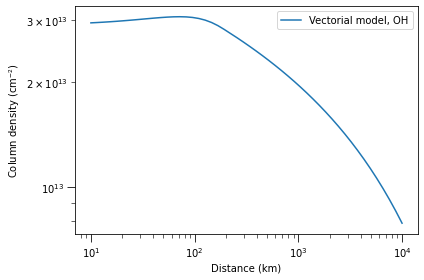

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rho = np.logspace(1, 4) * u.km
sigma = coma.column_density(rho).to('cm^-2')

ax = plt.gca()
ax.plot(rho, sigma, label='Vectorial model, OH')
plt.setp(ax, xlabel='Distance (km)', ylabel='Column density (cm$^{-2}$)', yscale='log', xscale='log')
plt.legend()
plt.tight_layout()